Moteur : http://www.fiches-auto.fr/articles-auto/fonctionnement-d-une-auto/s-1350-savoir-lire-une-fiche-technique.php
Couleur : https://code.peinturevoiture.fr/27595.html

https://benalexkeen.com/mapping-categorical-data-in-pandas/

In [3]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import re
%matplotlib inline 
sns.set(color_codes=True)

#pd.set_option('display.max_rows', 1000)
#pd.set_option('display.max_columns', 4)
pd.set_option('max_colwidth', 10000)
#pd.set_option('display.expand_frame_repr', False)
#pd.set_option('display.max_rows', None)

# https://regex101.com/
# https://docs.python.org/3/library/re.html

# I. Preprocessing des données

In [154]:
df = pd.read_csv("../Data_cars.csv")

In [5]:
df.head(1)

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description
0,11220.0,PEUGEOT,308,2014,94341.0 km,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI FAP 92CH BUSINESS 5P, puissance_fiscale: 4, portes: 5.0, options: banquette arrière 3 places;volant cuir;cache bagages;airbag frontal;banquette 1/3 - 2/3;sièges rang 2 rabattables à plat;vitres teintées;boucliers av et ar couleur caisse;phares av. de jour à LED;airbags rideaux;rétroviseurs électriques et dégivrants;siège conducteur avec réglage lombaire;vitres électriques;feux de freinage d'urgence;banquette rabattable;feux ar. à LED;AFU;contrôle de pression des pneus;airbags front. + lat.;blanc banquise;lampes de lecture à l'arrière;sièges réglables en hauteur;alarme d'oubli d'extinction des feux;EBD;volant sport;température extérieure;système audio;becquet;feux automatiques;fermeture électrique;ESP;fermeture électrique automatique;bacs de portes avant;anti patinage;accoudoir central avant;commandes du système audio au volant;fixations ISOFIX;poches d'aumonières;lampes de lecture à l'avant;lunette arrière dégivrante;essuie-glace arrière;ordinateur de bord;phares halogènes;climatisation;volant réglable en hauteur et profondeur;siège conducteur réglable hauteur;boite à gants réfrigérée;ABS;ceintures avant ajustables en hauteur;prise 12V;ecran tactile multifonction;FAP;3 ceintures ar. 3 points;ouverture des vitres séquentielle, couleur: BLANC BANQUISE"


**Model_year : fabrication ou de mise en circulation?**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166695 entries, 0 to 166694
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Price        166695 non-null  float64
 1   Make         166695 non-null  object 
 2   Model        166695 non-null  object 
 3   Model_year   166695 non-null  int64  
 4   Mileage      166695 non-null  object 
 5   Fuel         166695 non-null  object 
 6   Gearbox      166695 non-null  object 
 7   Online       166695 non-null  object 
 8   Description  166695 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 11.4+ MB


* Pas de données manquantes
* Mileage, Online and Description doivent être netoyé.

In [7]:
df.shape

(166695, 9)

In [155]:
maker_frequency = df['Make'].value_counts(normalize=True)
maker_frequency

RENAULT        0.184109
PEUGEOT        0.156687
CITROEN        0.105636
VOLKSWAGEN     0.067435
BMW            0.056534
                 ...   
BURBY S        0.000006
BELLIER        0.000006
SHELBY         0.000006
AUTOBIANCHI    0.000006
MATRA          0.000006
Name: Make, Length: 92, dtype: float64

**Faire un réequilibrage de données** ...SMOTE ?

Text(0, 0.5, 'Frequency')

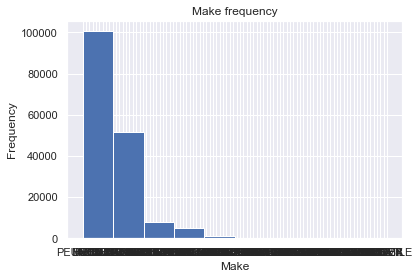

In [9]:
plt.hist(df['Make'])
plt.title('Make frequency')
plt.xlabel('Make')
plt.ylabel('Frequency')

# Data cleaning

In [156]:
df['Mileage'] = df['Mileage'].str.replace(".0 km","")
df['Mileage'] = df['Mileage'].astype("int32")
df[['Mileage']].head()

,Mileage
0,94341
1,39051
2,75381
3,92282
4,10


In [157]:
df['Online'] = pd.to_datetime(df['Online'], format='%d/%m/%Y à %Hh%M')

df['Online_date'] = df['Online'].dt.date
df['Online_time'] = df['Online'].dt.time

df['Online_year'] = df['Online'].dt.year
df['Online_month'] = df['Online'].dt.month
df['Online_month_day'] = df['Online'].dt.day
df['Online_hour'] = df['Online'].dt.hour
df['Online_minute'] = df['Online'].dt.minute
df['Online_week_day'] = df['Online'].dt.weekday
df[['Online', 'Online_date', 'Online_time', 'Online_year', 'Online_month', 'Online_month_day', 'Online_hour', 'Online_minute', 'Online_week_day']].head(2)

,Online,Online_date,Online_time,Online_year,Online_month,Online_month_day,Online_hour,Online_minute,Online_week_day
0,2018-07-06 03:47:00,2018-07-06,03:47:00,2018,7,6,3,47,4
1,2018-04-03 16:41:00,2018-04-03,16:41:00,2018,4,3,16,41,1


In [12]:
df[['Description']].head(1)

,Description
0,"modele: 308 (2E GENERATION), version: 1.6 HDI FAP 92CH BUSINESS 5P, puissance_fiscale: 4, portes: 5.0, options: banquette arrière 3 places;volant cuir;cache bagages;airbag frontal;banquette 1/3 - 2/3;sièges rang 2 rabattables à plat;vitres teintées;boucliers av et ar couleur caisse;phares av. de jour à LED;airbags rideaux;rétroviseurs électriques et dégivrants;siège conducteur avec réglage lombaire;vitres électriques;feux de freinage d'urgence;banquette rabattable;feux ar. à LED;AFU;contrôle de pression des pneus;airbags front. + lat.;blanc banquise;lampes de lecture à l'arrière;sièges réglables en hauteur;alarme d'oubli d'extinction des feux;EBD;volant sport;température extérieure;système audio;becquet;feux automatiques;fermeture électrique;ESP;fermeture électrique automatique;bacs de portes avant;anti patinage;accoudoir central avant;commandes du système audio au volant;fixations ISOFIX;poches d'aumonières;lampes de lecture à l'avant;lunette arrière dégivrante;essuie-glace arrière;ordinateur de bord;phares halogènes;climatisation;volant réglable en hauteur et profondeur;siège conducteur réglable hauteur;boite à gants réfrigérée;ABS;ceintures avant ajustables en hauteur;prise 12V;ecran tactile multifonction;FAP;3 ceintures ar. 3 points;ouverture des vitres séquentielle, couleur: BLANC BANQUISE"


Description contient plusieurs sous-champs qui sont séparés par une **','**

Le sous-champs Options contient des paramètres séparés par des **';'**

Certains paramètres dans Options contiennent des valeurs spécifiques. 
Leur patern est : **'; parametre : valeur'**. 

Pour les paramettres suivants dans Options : 
- finition brillantes pneus 
- noir anthracite finition brillantes avec pneus
- 5 J x 21 Pneus '
- réglages électriques des sièges -Conducteur

le patern est **', parametre : valeur'**

In [13]:
# Trouver les détail des champs dans Decription : separation par des ','
str_list = df['Description'].str.findall(r'(^.[^,;]*?:|,[^,;]*?:)').values.tolist()
str_list = list(filter(None, str_list))
flat_list = [item for sublist in str_list for item in sublist]
details = set(flat_list)
#details = [w.replace(', ', '') for w in details]
#details = [w.replace(':', '') for w in details]
details

{', couleur:',
 ', finition brillantes pneus :',
 ', noir anthracite finition brillantes avec pneus :',
 ', options:',
 ', portes:',
 ', puissance_fiscale:',
 ', réglages électriques des sièges -Conducteur :',
 ', version:',
 ',5 J x 21 Pneus :',
 'modele:'}

In [14]:
# Trouver les détail des champs dans Decription : separation par des ','
str_list = df['Description'].str.findall(r'(^.[^,; ]*?:|, [^,; ]*?:)').values.tolist()
str_list = list(filter(None, str_list))
flat_list = [item for sublist in str_list for item in sublist]
details = set(flat_list)
details = [w.replace(', ', '') for w in details]
details = [w.replace(':', '') for w in details]
details

['modele', 'couleur', 'version', 'options', 'puissance_fiscale', 'portes']

In [15]:
df[df['Description'].str.contains("finition brillantes pneus :")]['Description'].head(1)

7213    modele: RS3 (2E GENERATION) SPORTBACK, version: II (2) SPORTBACK 2.5 TFSI 400 QUATTRO S TRONIC, puissance_fiscale: 29, portes: 5.0, options: Rétroviseurs rabattables électriquement;Application décorative Carbone;Système audio carte digitale;Bluetooth inclut musique en streaming, connexion téléphone;Smart card / Smart key;Air conditionné 2 zones;Jantes en aluminium coulé en style Blade à 5 branches en noir anthracite brillant, finition brillantes pneus : 255/30 R19 AV et 235/35 R19 AR (uniquement sur RS 3 Sportback);Palettes au volant;Feux de croisement à LED;Freins régénérateurs;Antipatinage;Limiteur de vitesse;Sorties d'échappement Sport RS pour une sonorité encore plus sportive;Rétroviseurs extérieurs réglables, dégivrants et rabattables électriquement avec position automatique pour manoeuvre de stationnement et fonction jour / nuit automatiquecôté conducteur;Vitres arrière surteintées (Privacy glass);Volant suede & cuir;Alarme;Bang & Olufsen Sound System;Système de navigatio

In [158]:
df['modele'] = df['Description'].str.extract(r'(\bmodele\: \b.*?,)', expand=True) 
df['modele'] = df['modele'].str.replace("modele: ", "")
df['modele'] = df['modele'].str.replace(",", "")

df['version'] = df['Description'].str.extract(r'(\bversion\: \b.*?,)', expand=True)       
df['version'] = df['version'].str.replace("version: ", "")
df['version'] = df['version'].str.replace(",", "")

df['puissance_fiscale'] = df['Description'].str.extract(r'(\bpuissance_fiscale\: \b.*?,)', expand=True)       
df['puissance_fiscale'] = df['puissance_fiscale'].str.replace("puissance_fiscale: ", "")
df['puissance_fiscale'] = df['puissance_fiscale'].str.replace(",", "")

df['portes'] = df['Description'].str.extract(r'(\bportes\: \b.*?,)', expand=True)       
df['portes'] = df['portes'].str.replace("portes: ", "")
df['portes'] = df['portes'].str.replace(",", "")

df['couleur'] = df['Description'].str.extract(r'(\bcouleur\: \b.*?$)', expand=True)       
df['couleur'] = df['couleur'].str.replace("couleur: ", "")
df['couleur'] = df['couleur'].str.upper()

df['options'] = df['Description'].str.extract(r'(\boptions\b.*, couleur)', expand=True)       
df['options'] = df['options'].str.replace("options: ", "")
df['options'] = df['options'].str.replace(", couleur", "")

In [17]:
df[['Description', 'modele', 'version', 'puissance_fiscale', 'portes', 'couleur', 'options']].head(1)

,Description,modele,version,puissance_fiscale,portes,couleur,options
0,"modele: 308 (2E GENERATION), version: 1.6 HDI FAP 92CH BUSINESS 5P, puissance_fiscale: 4, portes: 5.0, options: banquette arrière 3 places;volant cuir;cache bagages;airbag frontal;banquette 1/3 - 2/3;sièges rang 2 rabattables à plat;vitres teintées;boucliers av et ar couleur caisse;phares av. de jour à LED;airbags rideaux;rétroviseurs électriques et dégivrants;siège conducteur avec réglage lombaire;vitres électriques;feux de freinage d'urgence;banquette rabattable;feux ar. à LED;AFU;contrôle de pression des pneus;airbags front. + lat.;blanc banquise;lampes de lecture à l'arrière;sièges réglables en hauteur;alarme d'oubli d'extinction des feux;EBD;volant sport;température extérieure;système audio;becquet;feux automatiques;fermeture électrique;ESP;fermeture électrique automatique;bacs de portes avant;anti patinage;accoudoir central avant;commandes du système audio au volant;fixations ISOFIX;poches d'aumonières;lampes de lecture à l'avant;lunette arrière dégivrante;essuie-glace arrière;ordinateur de bord;phares halogènes;climatisation;volant réglable en hauteur et profondeur;siège conducteur réglable hauteur;boite à gants réfrigérée;ABS;ceintures avant ajustables en hauteur;prise 12V;ecran tactile multifonction;FAP;3 ceintures ar. 3 points;ouverture des vitres séquentielle, couleur: BLANC BANQUISE",308 (2E GENERATION),1.6 HDI FAP 92CH BUSINESS 5P,4,5.0,BLANC BANQUISE,banquette arrière 3 places;volant cuir;cache bagages;airbag frontal;banquette 1/3 - 2/3;sièges rang 2 rabattables à plat;vitres teintées;boucliers av et ar couleur caisse;phares av. de jour à LED;airbags rideaux;rétroviseurs électriques et dégivrants;siège conducteur avec réglage lombaire;vitres électriques;feux de freinage d'urgence;banquette rabattable;feux ar. à LED;AFU;contrôle de pression des pneus;airbags front. + lat.;blanc banquise;lampes de lecture à l'arrière;sièges réglables en hauteur;alarme d'oubli d'extinction des feux;EBD;volant sport;température extérieure;système audio;becquet;feux automatiques;fermeture électrique;ESP;fermeture électrique automatique;bacs de portes avant;anti patinage;accoudoir central avant;commandes du système audio au volant;fixations ISOFIX;poches d'aumonières;lampes de lecture à l'avant;lunette arrière dégivrante;essuie-glace arrière;ordinateur de bord;phares halogènes;climatisation;volant réglable en hauteur et profondeur;siège conducteur réglable hauteur;boite à gants réfrigérée;ABS;ceintures avant ajustables en hauteur;prise 12V;ecran tactile multifonction;FAP;3 ceintures ar. 3 points;ouverture des vitres séquentielle


In [18]:
df['portes'].value_counts()

5.0    138807
3.0     11597
4.0      8540
2.0      6443
0.0        17
6.0         2
Name: portes, dtype: int64

**0 et 6** des outliers ?

## Netoyage du champs 'options'

In [159]:
#1. options avec quotes
df[df['Description'].str.contains("options: \"")]['options'].head(1)

6    "anti démarrage;radar de recul;prises audio auxiliaires;direction assistée;banquette 1/3 - 2/3;airbags;régulateur de vitesse;phares av. de jour à LED;projecteurs antibrouillard;climatisation automatique multi zone;kit téléphone main libre;rétroviseurs rabattables électriquement;jantes alu 17"";sièges sport;aide parking;sièges réglables en hauteur;carnet d'entretien;système audio carte SD MP3;feux automatiques;anti patinage;fixations ISOFIX;4 vitres électriques;ordinateur de bord;système audio CD;volant réglable en hauteur et profondeur;kit téléphone main libre bluetooth;4 roues motrices;feux et essuie-glaces automatiques;ABS;peinture métallisée;volant multifonctions;détecteur de pluie"
Name: options, dtype: object

In [160]:
# suppression des quotes
df['options'] = df['options'].str.replace("\"", "")

In [21]:
df[df['Description'].str.contains("options: \"")]['options'].head(1)

6    anti démarrage;radar de recul;prises audio auxiliaires;direction assistée;banquette 1/3 - 2/3;airbags;régulateur de vitesse;phares av. de jour à LED;projecteurs antibrouillard;climatisation automatique multi zone;kit téléphone main libre;rétroviseurs rabattables électriquement;jantes alu 17;sièges sport;aide parking;sièges réglables en hauteur;carnet d'entretien;système audio carte SD MP3;feux automatiques;anti patinage;fixations ISOFIX;4 vitres électriques;ordinateur de bord;système audio CD;volant réglable en hauteur et profondeur;kit téléphone main libre bluetooth;4 roues motrices;feux et essuie-glaces automatiques;ABS;peinture métallisée;volant multifonctions;détecteur de pluie
Name: options, dtype: object

In [22]:
#2. options vide
df[df['Description'].str.contains("options: ,")]['Description'].head(1) 

8    modele: C-MAX 2, version: II 1.6 TDCI 115 FAP TITANIUM BVM6, puissance_fiscale: 6, portes: 5.0, options: , couleur: brun
Name: Description, dtype: object

In [161]:
#Replace '' sting with Nan
df['options'].replace('', np.nan, inplace=True)

In [162]:
df[df['options'].isna()]['options']

8         NaN
34        NaN
84        NaN
85        NaN
86        NaN
         ... 
166536    NaN
166664    NaN
166671    NaN
166687    NaN
166688    NaN
Name: options, Length: 4659, dtype: object

### Création de listes d'options

In [163]:
#les option sont séparées par des ';'
df['options'].str.split(";").head(1)

0    [banquette arrière 3 places, volant cuir, cache bagages, airbag frontal, banquette 1/3 - 2/3, sièges rang 2 rabattables à plat, vitres teintées, boucliers av et ar couleur caisse, phares av. de jour à LED, airbags rideaux, rétroviseurs électriques et dégivrants, siège conducteur avec réglage lombaire, vitres électriques, feux de freinage d'urgence, banquette rabattable, feux ar. à LED, AFU, contrôle de pression des pneus, airbags front. + lat., blanc banquise, lampes de lecture à l'arrière, sièges réglables en hauteur, alarme d'oubli d'extinction des feux, EBD, volant sport, température extérieure, système audio, becquet, feux automatiques, fermeture électrique, ESP, fermeture électrique automatique, bacs de portes avant, anti patinage, accoudoir central avant, commandes du système audio au volant, fixations ISOFIX, poches d'aumonières, lampes de lecture à l'avant, lunette arrière dégivrante, essuie-glace arrière, ordinateur de bord, phares halogènes, climatisation, volant réglabl

#### Cas spécifiques
Voir avec le prof si:

'Jantes en aluminium coulé en style Blade à 5 branches en noir anthracite brillant, finition brillantes pneus : 255/30 R19 AV et 235/35 R19 AR (uniquement sur RS 3 Sportback)',

est une seule option

In [27]:
df.iloc[7213]['options_list']

KeyError: 'options_list'

**Utiliser le traitement du texte pour automatiser ????**

In [47]:
#
def func (liste):
    res =[]
    for sublist in liste:
        if isinstance(sublist, list):
            for item in sublist:
                res.append(item) 
        else:
            res.append(sublist)
    #liste = [item for sublist in liste for item in sublist]
    return res
#df['test'] = df['options_list'].apply(lambda x: func(x))

#df.iloc[138747]['test']

## Netoyage du champs Couleur

In [164]:
df['couleur'].value_counts()

GRIS                    20934
BLANC                   20509
NOIR                    18362
ROUGE                    4527
BLEU                     4158
                        ...  
BLEU TIVOLI                 1
NOIR ET BLANC               1
BLACK SHADOW                1
ROUGE BORDEAU               1
326G-BLANC ARCTIQUE-        1
Name: couleur, Length: 6672, dtype: int64

In [30]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
#nltk.download('averaged_perceptron_tagger')

#df['couleur_token'] = df['couleur'].apply(lambda s : word_tokenize(str(s)))
#couleur_token = [item for sublist in df['couleur_token'].tolist() for item in sublist]
#couleur_token = set(couleur_token)

In [31]:
import urllib.request
from bs4 import BeautifulSoup

html = urllib.request.urlopen('http://www.ludowalsh.com/HTM/Liste_de_couleurs.htm').read()

soup = BeautifulSoup(html, 'html.parser')

color_tables = soup.find_all('table', class_="wikitable")
couleurs = []
for table in color_tables:  
    couleurs.append(table.find_all(lambda tag: tag.name == "a"))
    
couleurs = [item for sublist in couleurs for item in sublist]

couleurs_list = []
for item in couleurs:
    groups = re.search(r">.*<", str(item))
    if groups!= None:
        #for group in groups.group():
        couleurs_list.append(groups.group())

couleurs_list = set(couleurs_list)
couleurs_all = []
for item in couleurs_list:
    couleurs_all.append(item.replace('>','').replace('<','').upper())

# ordre suivant le nombre de mots: prévéligier les couleurs composées (plus de choix ... parsemé)
couleurs_all.sort(key=lambda x: len(x.split()), reverse=False)
# ordre suivant le nombre de mots: prévéligier les couleurs unique (agrégé)
couleurs_all.sort(key=lambda x: len(x.split()), reverse=True)

print("Nombre de couleurs : ",len(couleurs_all))

Nombre de couleurs :  405


In [165]:
def func_couleur(s):
    couleur = np.nan
    for i in range(len(couleurs_all)):
        if couleurs_all[i] in str(s):
            couleur = couleurs_all[i]
    return couleur

df['couleur_dominante'] = df.apply(lambda row : func_couleur(row['couleur']), axis = 1)

In [166]:
df[['couleur','couleur_dominante']]

,couleur,couleur_dominante
0,BLANC BANQUISE,BLANC
1,CARBONSCHWARZ METALLISE,NaN
2,NOIR PANTHERE CRISTAL,NOIR
3,JAUNE,JAUNE
4,BLANC VERNI,BLANC
...,...,...
166690,GRIS FONCE,GRIS
166691,NOIR METAL,NOIR
166692,NOIR,NOIR
166693,GRIS,GRIS


In [168]:
types_peinture =['METAL', 'NACRE', 'CHROME', 'CANDY', 'VERNI', ' MAT', 'UNI', 'OPAQE', 'CRISTAL']

def func_type_peinture(s):
    type_ = np.nan
    for t in types_peinture:
        if t in str(s):
            type_ = t
    return type_

df['couleur_type_peinture'] = df.apply(lambda row : func_type_peinture(row['couleur']), axis = 1)

In [64]:
#df.loc[df['couleur'].isna(),'couleur'] = ''
df[df['couleur'].str.contains('CRISTAL')]['couleur'].value_counts()

BLANC CRISTAL                      102
NOIR CRISTAL                        25
707 BLANC CRISTAL MÉTAL              3
BLANC CRISTAL MÉTALLISÉ 707          3
WHITE CRISTAL                        2
BLEU ARA CRISTAL AUDI EXCLUSIVE      2
NOIR PANTHERE CRISTAL                2
EMERALD CRISTAL                      2
CRISTAL WHITE PEARL                  1
707 BLANC CRISTAL METAL              1
BLANC CRISTAL TOIT NOIR              1
707 BLANC CRISTAL METALISEE          1
BLANC CRISTAL TOIT N                 1
BLAN CRISTAL                         1
707 BLANC CRISTAL MÉTALISÉE          1
ROUGE CRISTAL                        1
GRISMERCURE ROUGECRISTAL             1
GRANITE CRISTAL                      1
ARGENT PRISMA CRISTAL                1
707 BLANC CRISTAL METALLI            1
Name: couleur, dtype: int64

In [169]:
df['couleur_type_peinture'].isna().sum()

132891

## Champs Vesion

In [37]:
df['version']

0                                               1.6 HDI FAP 92CH BUSINESS 5P
1                                                                        NaN
2                                   III AVANT 4.0 TFSI 560 QUATTRO TIPTRONIC
3                                                                 1.3 70 FUN
4                                                           II SW 1.4 95 POP
                                         ...                                
166690               IV (2) AVANT 2.0 TDI 177 BUSINESS LINE QUATTRO S TRONIC
166691    VII 2.0 TDI 150 BLUEMOTION TECHNOLOGY CONFORTLINE BUSINESS DSG6 5P
166692                                 V (2) 1.0 ECOBOOST 100 S&S EDITION 5P
166693                          III 2.0 TDI 150 GREEN TEC BUSINESS PLUS DSG6
166694                             II 2.0 DCI 175 ENERGY INTENS 4X2 X-TRONIC
Name: version, Length: 166695, dtype: object

## Trasformation de données

In [186]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split

X = df.drop(['Price'], axis=1).copy()
y = df['Price'].values.copy() # prices in R$

# generate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# categorical features
cat_ft = ['Gearbox', 'Fuel', 'Model', 'Make']

# run once on full dataset to get all category values
temp = ColumnTransformer([('cat', OneHotEncoder(), cat_ft)]).fit(X)
cats = temp.named_transformers_['cat'].categories_

cat_tr = OneHotEncoder(categories=cats, sparse=False)

# numerical features
num_ft = ['puissance_fiscale', 'Mileage', 'Model_year']
num_tr = StandardScaler()
#num_tr = FunctionTransformer(func=None)

# data transformer
data_tr = ColumnTransformer([('num', num_tr, num_ft), ('cat', cat_tr, cat_ft)])


In [179]:
type(data_tr)

sklearn.compose._column_transformer.ColumnTransformer

In [65]:
df['couleur_dominante'] = df['couleur_dominante'].astype("category").cat.codes
df['couleur_type_peinture'] = df['couleur_type_peinture'].astype("category").cat.codes

In [69]:
df['Gearbox'].value_counts()

mécanique      113014
automatique     53681
Name: Gearbox, dtype: int64

In [70]:
df['Gearbox'] = df['Gearbox'].astype("category").cat.codes
df['Gearbox'].value_counts()

1    113014
0     53681
Name: Gearbox, dtype: int64

In [67]:
df['Fuel'].value_counts()

Diesel                              109446
Essence                              53392
Hybride essence électrique            2725
Electrique                             704
Hybride diesel électrique              310
Bicarburation essence GPL               96
Bicarburation essence bioéthanol        21
Bicarburation essence GNV                1
Name: Fuel, dtype: int64

https://achat-voiture.ooreka.fr/astuce/voir/634491/bicarburation-essence-gpl

In [71]:
df['Fuel'] = df['Fuel'].astype("category").cat.codes
df['Fuel'].value_counts()

3    109446
5     53392
7      2725
4       704
6       310
1        96
2        21
0         1
Name: Fuel, dtype: int64

In [73]:
df['Model'].value_counts()

CLIO         7967
308          6123
208          6053
MEGANE       5212
CAPTUR       4410
             ... 
550             1
K5 BLAZER       1
400             1
504             1
SC              1
Name: Model, Length: 846, dtype: int64

In [74]:
df['Model'] = df['Model'].astype("category").cat.codes
df['Model'].value_counts()

251    7967
46     6123
31     6053
507    5212
213    4410
       ... 
677       1
805       1
422       1
678       1
441       1
Name: Model, Length: 846, dtype: int64

## Valeurs extrême

In [92]:
df['puissance_fiscale'].isna().sum()

0

## Valeur manquantes

## Dataset spletting

Les features à utiliser : 
* Model
* Mileage
* Fuel
* Gearbox
* Model_year
* Make
* portes
* puissance_fiscale

In [97]:
input_features = ['Model', 'Mileage', 'Fuel', 'Gearbox', 'Model_year', 'puissance_fiscale']
X = df[input_features].copy()
y = df['Price']

In [99]:
X_train.shape, X_test.shape

((111685, 6), (55010, 6))

## Comparaison des modèles

In [208]:
## inspéré de : https://angelosalton.github.io/2019/01/29/predicting-car-prices-with-scikit-learn.html
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn import ensemble
from sklearn.pipeline import Pipeline#, FeatureUnion
from sklearn import metrics

models = [DummyRegressor(),
          KNeighborsRegressor(),
          #linear_model.LinearRegression(), # ommited because of negative scores
          linear_model.Lasso(),
          linear_model.Ridge(),
          linear_model.ElasticNet(),
          ensemble.GradientBoostingRegressor(),
          ensemble.RandomForestRegressor(),
          ensemble.ExtraTreesRegressor()]

models_names = ['Dummy','K-nn',
                #'LinearRegres',
                'Lasso','Ridge','Elastic','Boost','Forest','Extra']


In [209]:
#scores = []
#mse = []
#mae = []

for model in models:
    pipe = Pipeline([
    ('features', data_tr),
    ('model', model)
    ])
    #fits = pipe.fit(X_train,y_train)
    #scores.append(metrics.r2_score(y_test, fits.predict(X_test)))
    #mse.append(metrics.mean_squared_error(y_test, fits.predict(X_test)))
    #mae.append(metrics.median_absolute_error(y_test, fits.predict(X_test)))


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5877059109.05957, tolerance: 3571539745.5676064
  positive)


Text(0, 0.5, 'Median absolute error')

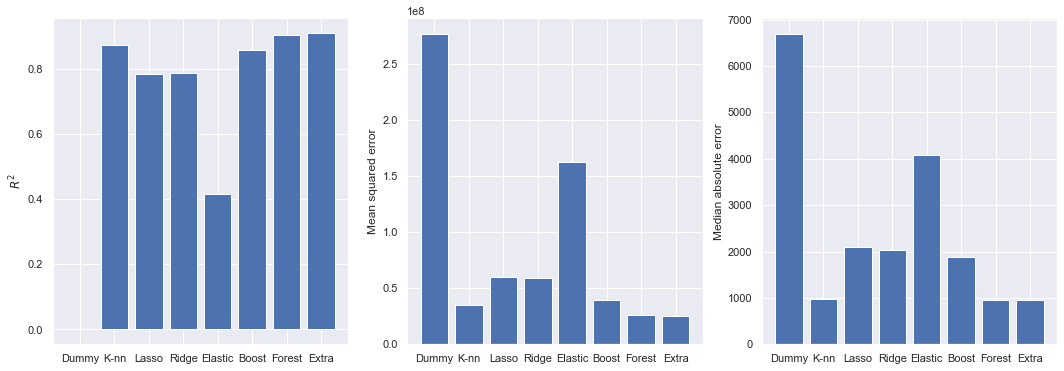

In [223]:
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True, sharey=False, figsize=(18,6))
ax1.bar(models_names, scores)
ax1.set_ylabel('$R^2$')
ax2.bar(models_names, mse)
ax2.set_ylabel('Mean squared error')
ax3.bar(models_names, mae)
ax3.set_ylabel('Median absolute error')


In [224]:
result = pd.DataFrame(data=list(zip(models_names, scores, mse, mae)), columns=['model', 'scores', 'mse', 'mae'])
result

,model,scores,mse,mae
0,Dummy,-0.000017,2.768512e+08,6696.788258
1,K-nn,0.873419,3.504348e+07,975.800000
2,Lasso,0.783889,5.982959e+07,2089.957315
3,Ridge,0.787957,5.870344e+07,2034.186650
4,Elastic,0.414031,1.622235e+08,4073.627094
5,Boost,0.856369,3.976384e+07,1878.112097
6,Forest,0.904470,2.644716e+07,947.490000
7,Extra,0.909505,2.505310e+07,952.920000


Nous remarquons que le meilleur score est donné par le modèle Extra suivi de Random forest. Alors que  

,model,scores,mse,mae
0,Dummy,-0.000017,2.768512e+08,6696.788258
1,K-nn,0.873419,3.504348e+07,975.800000
2,Lasso,0.783889,5.982959e+07,2089.957315
3,Ridge,0.787957,5.870344e+07,2034.186650
4,Elastic,0.414031,1.622235e+08,4073.627094
5,Boost,0.856369,3.976384e+07,1878.112097
6,Forest,0.904470,2.644716e+07,947.490000
7,Extra,0.909505,2.505310e+07,952.920000


In [142]:
model = ensemble.RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.74 (+/- 0.14)


In [143]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## Amélioration du modèle selectionné

## Entrainement du modèle final

In [144]:
pred = model.predict(X_test)

In [145]:
pred = pd.DataFrame.from_dict({'predicted':pred, 'true':y_test})
pred['difference'] = pred.predicted - pred.true
pred
pred['difference'].sum()

,predicted,true,difference
51504,6729.170000,7942.0,-1212.830000
18650,9755.810000,8936.0,819.810000
101152,10561.050000,11651.0,-1089.950000
63336,18728.030000,18206.0,522.030000
136178,8809.440000,8102.0,707.440000
...,...,...,...
38775,19342.930000,16287.0,3055.930000
158408,11603.450000,11393.0,210.450000
81665,9035.290000,7539.0,1496.290000
71902,11945.890000,9405.0,2540.890000


In [146]:
pred['difference'].sum()

2083276.4351860587

In [147]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.22 (+/- 0.06)


In [148]:
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [149]:
pred = model.predict(X_test)

In [150]:
pred = pd.DataFrame.from_dict({'predicted':pred, 'true':y_test})
pred['difference'] = pred.predicted - pred.true
pred


,predicted,true,difference
51504,6415.8,7942.0,-1526.2
18650,15070.6,8936.0,6134.6
101152,10384.6,11651.0,-1266.4
63336,18651.6,18206.0,445.6
136178,7807.0,8102.0,-295.0
...,...,...,...
38775,15527.6,16287.0,-759.4
158408,23709.0,11393.0,12316.0
81665,21079.2,7539.0,13540.2
71902,13116.0,9405.0,3711.0


In [151]:
pred['difference'].sum()

-32303189.399999995

In [421]:
#df['parametres'].apply(lambda x : type(x))#.str.replace(')
#df['parametres']#.values.replace(',','n')
#df['parametres'] 
df[df['Description'].str.contains(",5 J x 21 Pneus :")]['options_list'].head(1)

81354    [Peinture métallisée, Alarme antivol, Rétroviseurs rabattables électriquement, Fermerture électrique du coffre, Système audio carte digitale, Bluetooth inclut musique en streaming, connexion téléphone, Rétroviseurs extérieurs chauffants, Pack Assistance Stationnement, Smart card / Smart key, Audi park assist, Palettes au volant, Taille écran multi-fonctions 7 pouces, Feux de croisement à LED, Jantes en aluminium coulé style 5 branches doubles en V (style S), gris contrasté, partiellement polies 8,5 J x 21 Pneus : 255/40 R 21, Freins régénérateurs, Antipatinage, Limiteur de vitesse, Pack Éclairage d'ambiance (en plus du pack Éclairage [QQ1]), Système de navigation info trafic, Adaptive cruise control, Chargeur 1 CD, Tapis de sol, Eléments de commande en cuir Audi exclusive, Affichage tête haute, Indicateur de sous-gonflage des pneus, Siège avant chauffant, Étriers de frein peints en rouge à l'avant et à l'arrière avec inscription S, Ouverture du coffre à distance, Accoudoir cen

In [422]:
df[df['Description'].str.contains("pneus :")]['Description'].head(1)

4568    modele: Q7 (2E GENERATION), version: II V6 3.0 TDI CD 272 S LINE QUATTRO TIPTRONIC 7PL, puissance_fiscale: 17, portes: 5.0, options: efficiency;contrasté gris poli;projecteurs xénon;offroad ou lift/offroad et individual;phares av. de jour à LED;9jx20&quot avec pneus : 285/45 r20 112 y xl;caméra de recul;jantes alu 20&quot;7 places;version 7 places (avec 3ème rangée de sièges);sièges sport;jantes en aluminium coulé style étoile 10 branches;kit de réparation crevaison;carnet d'entretien;mmi navigation plus avec mmi touch;sellerie s line en cuir valcona avec estampillage s sur le dossier des sièges av;pack éclairage intérieur à led;climatisation automatique;audi virtual cockpit combiné d'instruments entièrement numérique de 12.3&quot avec affichage haute résolution;vitres surteintées;dynamic, couleur: gris
Name: Description, dtype: object

In [143]:
df.iloc[81354]['options_list']

['Peinture métallisée',
 'Alarme antivol',
 'Rétroviseurs rabattables électriquement',
 'Fermerture électrique du coffre',
 'Système audio carte digitale',
 'Bluetooth inclut musique en streaming, connexion téléphone',
 'Rétroviseurs extérieurs chauffants',
 'Pack Assistance Stationnement',
 'Smart card / Smart key',
 'Audi park assist',
 'Palettes au volant',
 'Taille écran multi-fonctions 7 pouces',
 'Feux de croisement à LED',
 'Jantes en aluminium coulé style 5 branches doubles en V (style S), gris contrasté, partiellement polies 8,5 J x 21 Pneus : 255/40 R 21',
 'Freins régénérateurs',
 'Antipatinage',
 'Limiteur de vitesse',
 "Pack Éclairage d'ambiance (en plus du pack Éclairage [QQ1])",
 'Système de navigation info trafic',
 'Adaptive cruise control',
 'Chargeur 1 CD',
 'Tapis de sol',
 'Eléments de commande en cuir Audi exclusive',
 'Affichage tête haute',
 'Indicateur de sous-gonflage des pneus',
 'Siège avant chauffant',
 "Étriers de frein peints en rouge à l'avant et à l'arr